# 4 子串

## 4.1 和为K的子数组

输入：nums = [1,1,1], k = 2  
输出：2

In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        prefix_count = {0: 1}  # 初始化：前缀和为0出现1次
        current_sum = 0
        result = 0
        
        for num in nums:
            current_sum += num  # 计算当前前缀和
            # 查找有多少个前缀和等于 current_sum - k
            target = current_sum - k
            if target in prefix_count:
                result += prefix_count[target]
            # 更新当前前缀和的出现次数
            prefix_count[current_sum] = prefix_count.get(current_sum, 0) + 1
        
        return result

## 4.2 滑动窗口最大值

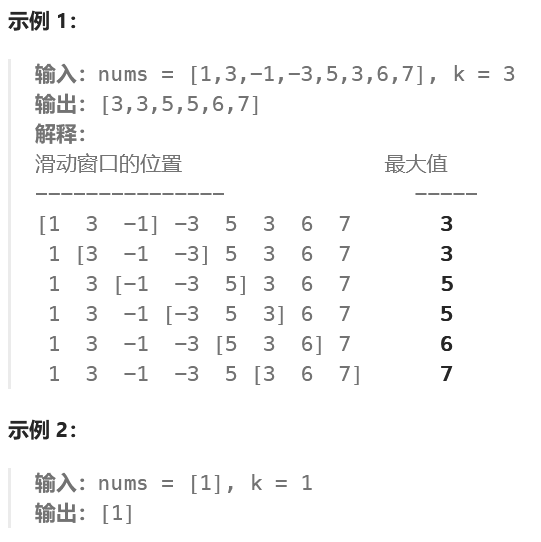

In [ ]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        if not nums or k == 0:
            return []
        
        q = deque()  # 单调递减队列，存储元素索引
        result = []
        
        for i in range(len(nums)):
            # 1. 维护队列单调性：删除比当前元素小的所有元素（它们不可能成为后续窗口的最大值）
            while q and nums[i] >= nums[q[-1]]:
                q.pop()
            
            # 2. 加入当前元素的索引
            q.append(i)
            # 3. 移除窗口外的元素（队首元素已滑出窗口）
            while q[0] <= i - k:
                q.popleft()
            
            # 4. 第一个完整窗口从 i=k-1 开始，记录队首（当前窗口最大值）
            if i >= k - 1:
                result.append(nums[q[0]])
        
        return result

NameError: name 'List' is not defined

## 4.3 最小覆盖子串

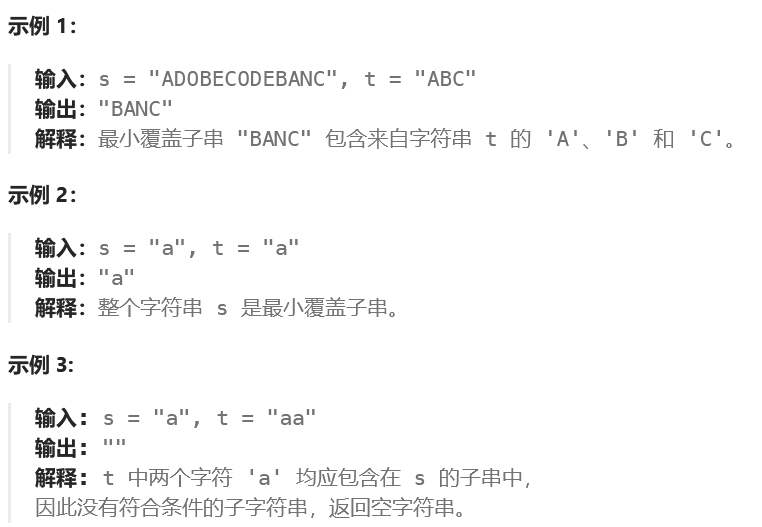

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        # 统计t中各字符的需求次数
        need = defaultdict(int)
        for c in t:
            need[c] += 1
        # 需要满足的字符种类数
        need_cnt = len(need)
        
        # 滑动窗口的左右指针，初始为0
        left = 0
        # 记录窗口中满足需求的字符数
        valid = 0
        # 记录最小窗口的起始索引和长度（初始长度设为无穷大）
        start = 0
        min_len = float('inf')
        
        # 右指针遍历s，扩展窗口
        for right in range(len(s)):
            c = s[right]
            # 如果当前字符是t需要的，更新计数
            if c in need:
                need[c] -= 1
                # 该字符的需求刚好满足（从1变为0），有效字符数+1
                if need[c] == 0:
                    valid += 1
            
            # 当窗口包含t所有字符时，收缩左指针
            while valid == need_cnt:
                # 更新最小窗口
                current_len = right - left + 1
                if current_len < min_len:
                    start = left
                    min_len = current_len
                
                # 左指针移出字符
                d = s[left]
                left += 1
                # 如果移出的是t需要的字符，更新计数
                if d in need:
                    # 该字符的需求从0变为1，有效字符数-1
                    if need[d] == 0:
                        valid -= 1
                    need[d] += 1
        
        # 若未找到有效窗口，返回空字符串，否则返回最小子串
        return "" if min_len == float('inf') else s[start:start+min_len]